### Step 1. 스티커 구하기 or 만들기
---

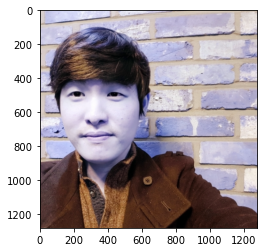

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import os
my_image_path = os.getenv('HOME')+'/project/aiffel-lms/E10_Sticker_Camera/images/my_image.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (1280, 1280))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

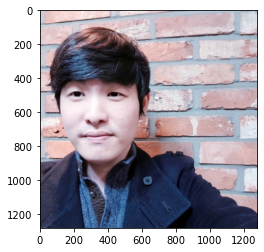

In [2]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### Step 2. 얼굴 검출 & 랜드마크 검출 하기
---
오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

In [3]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

In [4]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 3)   #- (image, num of img pyramid)

rectangles[[(98, 375) (595, 871)]]


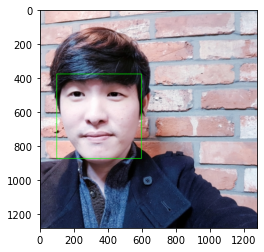

In [5]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [6]:
model_path = os.getenv('HOME')+'/project/aiffel-lms/E10_Sticker_Camera/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [7]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

    print(len(list_landmarks[0]))

68


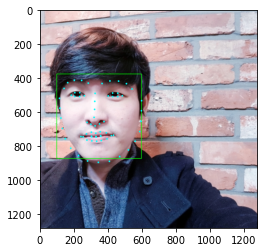

In [8]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 5, (255, 255, 0), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### Step 3. 스티커 적용 위치 확인하기
---
- 고양이 수염이 적용 될 볼 위치를 landmark를 사용해서 계산해 주세요.
- 볼은 '턱', '눈', '입', '코' 사이에 있다는 점을 이용해 주세요. 비율로 계산하는 방법 잊지 않으셨죠?

- [hint] 2, 36, 48, 30 번 인덱스를 이용

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[2])
    x = landmark[30][0]
    y = landmark[30][1] 
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y): (%d, %d)'%(x,y))
    print('(w,h): (%d, %d)'%(w,h))
    

(122, 634)
(x,y): (317, 630)
(w,h): (498, 498)


### Step 4. 스티커 적용하기
---
- (1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

- (2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다.

- [hint] opencv 의 cv2.addWeighted() 를 참고하세요.

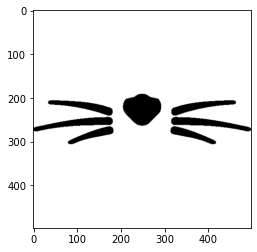

(498, 498, 3)


In [10]:
sticker_path = os.getenv('HOME') + '/project/aiffel-lms/E10_Sticker_Camera/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)
plt.show()
print(img_sticker.shape)


In [11]:
refined_x = x - w//2
refined_y = y - h//2
refined_x, refined_y = max(0, refined_x), max(0, refined_y)
print('(x,y): (%d,%d)'%(refined_x, refined_y))
print(img_sticker.shape)

(x,y): (68,381)
(498, 498, 3)


In [12]:
#img_sticker = img_sticker[-refined_y:]
#print(img_sticker.shape)

In [13]:
#refined_y = landmark[30][1]

In [23]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

(498, 498, 3)


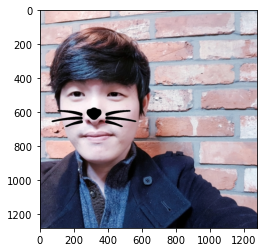

In [24]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### Step 5. 문제점 찾아보기
---
- (1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

- (2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

- 오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

- 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
- 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
- 실행 속도가 중요할까요?
- 스티커앱을 만들 때 정확도가 얼마나 중요할까요?